### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Яссин Мохамад Аламин
##### Группа:   НКНбд-01-20

## Москва 2023
***

# Вариант №10
Лабораторная работа 1


## Текст задания:

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/chlorides 

4. Визуализация для независимой переменной – диаграмма размаха 

5. Визуализация для зависимой переменной – эмпирическая функция распределения 

6. Показатель качества регрессии – MSE (mean squared error) 

## Решение:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

Результат лабораторной работы оформить в виде отчета (шаблона отчета находится в учебных материалах команды в формате .ipynb) в формате PDF. Обязательно включить в отчет номер варианта и текст задания, программный код и пояснения с нему. Дополнительно представить файл Jupiter Notebook (с расширением .ipynb). Не архивировать файлы.

Отчет по лабораторной работе представить как результат выполнения задания MS Teams (представить файлы PDF и ipynb). Не забыть нажать на кнопку сдачи задания.

In [ ]:
# Все imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #Heatmap

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

### №1 
1- Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.


In [ ]:
dataset = tfds.load("wine_quality", split='train') 
df = tfds.as_dataframe(dataset)
# Удалим прерывные 
df = df.drop('quality', axis=1)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   features/alcohol               4898 non-null   float32
 1   features/chlorides             4898 non-null   float32
 2   features/citric acid           4898 non-null   float32
 3   features/density               4898 non-null   float32
 4   features/fixed acidity         4898 non-null   float32
 5   features/free sulfur dioxide   4898 non-null   float32
 6   features/pH                    4898 non-null   float32
 7   features/residual sugar        4898 non-null   float32
 8   features/sulphates             4898 non-null   float64
 9   features/total sulfur dioxide  4898 non-null   float32
 10  features/volatile acidity      4898 non-null   float32
dtypes: float32(10), float64(1)
memory usage: 229.7 KB


<Axes: >

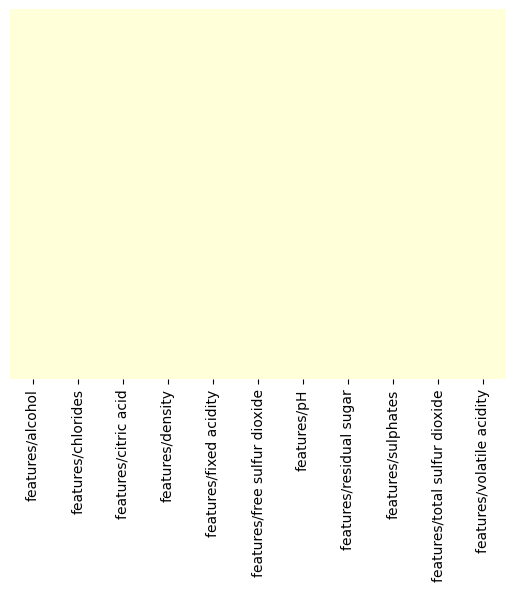

In [ ]:
# Удалим NULL значение если они есть
df.dropna(subset=['features/chlorides'], inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

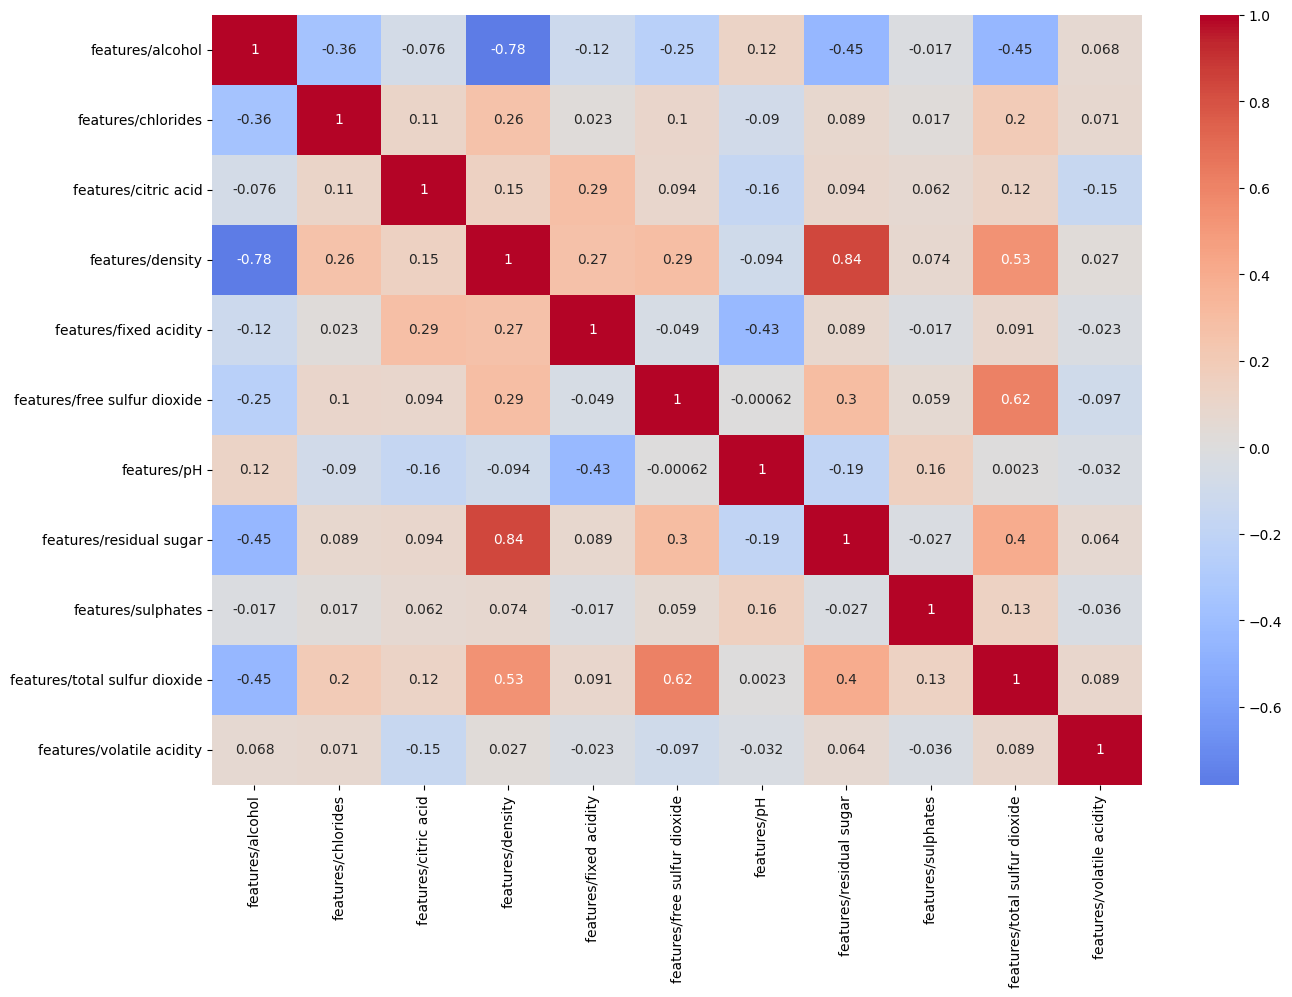

In [ ]:
# corr
sns.heatmap(data=df.corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(15,10))[1]);

Из картинки вверх видим что alcohol and density имееет самое высокое значение, ph and freesulfur dioxide

### №2 
2- Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

In [ ]:
X = df['features/density']
y = df['features/chlorides']

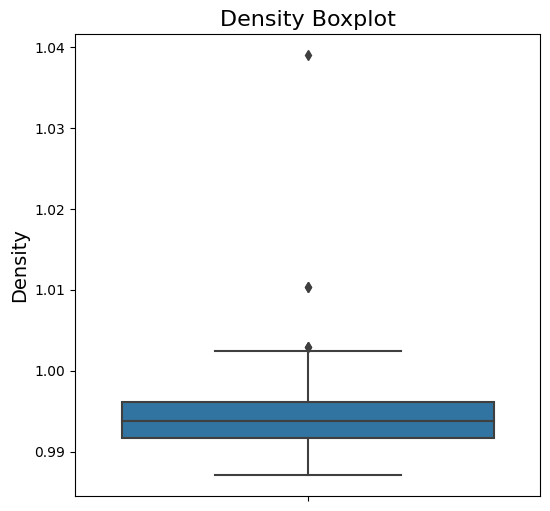

In [ ]:
# Диграмма Размаха
plt.figure(figsize=(6,6))
sns.boxplot(y=X)
plt.title('Density Boxplot', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.show()

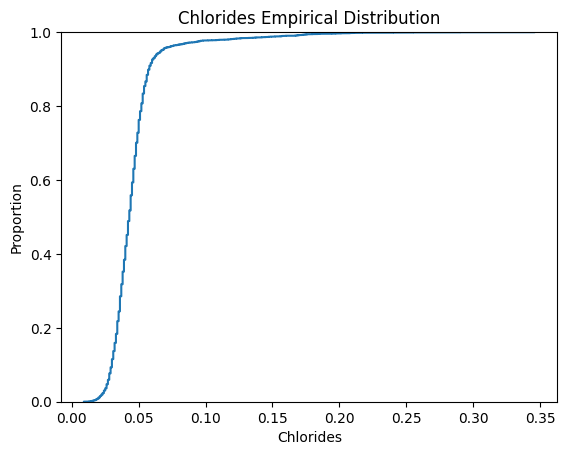

In [ ]:
# эмпирическая функция распределения
sns.ecdfplot(x=y)
plt.title('Chlorides Empirical Distribution')
plt.xlabel('Chlorides')
plt.show()

### №3
3- Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R^2 двух подходов.

In [ ]:
X = df['features/density'].values.reshape(-1, 1)
y = df['features/chlorides'].values

In [ ]:
# обучение модели
model = LinearRegression().fit(X, y)

# предсказание
y_pred = model.predict(X)

# оценка качества
r2 = r2_score(y, y_pred)

print("R^2: {:.2f}".format(r2))

R^2: 0.07


In [ ]:
# создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

tf.random.set_seed(42)

# компиляция модели
model.compile(optimizer='adam', loss='mse')

# обучение модели
model.fit(X, y, epochs=110, verbose=False)

# предсказание
y_pred = model.predict(X)

# оценка качества
r2 = r2_score(y, y_pred)

print("R^2: {:.2f}".format(r2))

154/154 [==============================] - 0s 1ms/step
R^2: 0.03


Заметим, что значения отличаются незначительно, из-за того, что в tf необходимо выполнить compile, где используются optimizer и loss. В целом, теоретически они должны быть равными.

### №4
4- Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

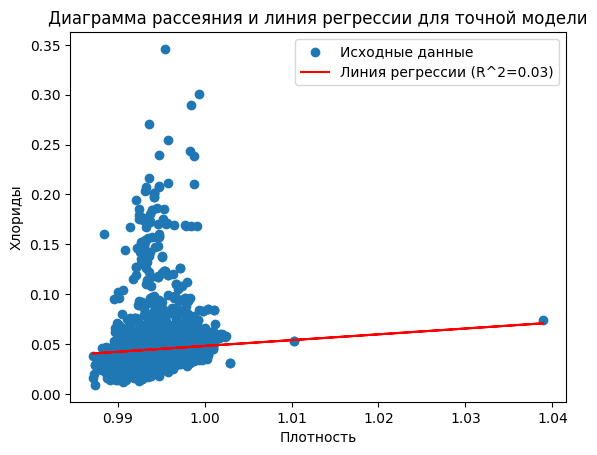

In [ ]:
# Построение диаграммы рассеяния и линии регрессии
fig, ax = plt.subplots()
ax.scatter(X, y, label='Исходные данные')
ax.plot(X, y_pred, color='red', label=f'Линия регрессии (R^2={r2:.2f})')
ax.set_xlabel('Плотность')
ax.set_ylabel('Хлориды')
ax.set_title('Диаграмма рассеяния и линия регрессии для точной модели')
ax.legend()
plt.show()

### №5

5- Разбейте набор признаков на обучающую и контрольную выборки (любым способом). Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

In [ ]:
# Разбиение данных на обучающую и контрольную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и адаптация нормализующего слоя

feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(1,)) 
feature_normalizer.adapt(feature)
feature_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=1)
])

feature_model.summary()

### №6
6- Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:
·        линейной регрессии

·        гребневой регрессии (L2)

·        лассо регрессии (L1)

1- Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

2- Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

3- Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [ ]:
# Input
inputs = Input(shape=(X_train.shape[1],))
# Norm
normalized = normalizer(inputs)
# output LR
outputs = Dense(1)(normalized)

lin_reg_model = Model(inputs, outputs)
lin_reg_model.compile(optimizer='adam', loss='mse')
history_lin_reg = lin_reg_model.fit(X_train, y_train, epochs=50, verbose=0)

# output ridge
outputs = Dense(1, kernel_regularizer=regularizers.l2(0.01))(normalized)

ridge_model = Model(inputs, outputs)
ridge_model.compile(optimizer='adam', loss='mse')
history_ridge = ridge_model.fit(X_train, y_train, epochs=50,  verbose=0)


#output lasso
outputs = Dense(1, kernel_regularizer=regularizers.l1(0.01))(normalized)

lasso_model = Model(inputs, outputs)
lasso_model.compile(optimizer='adam', loss='mse')
history_lasso = lasso_model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_pred_lin_reg = lin_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Compute MSE

mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Вывести MSE scores
print("MSE на тестовой выборке:")
print(f"Линейная регрессия: {mse_lin_reg:.4f}")
print(f"Гребневая регрессия: {mse_ridge:.4f}")
print(f"Лассо регрессия: {mse_lasso:.4f}")

# Искать best model based on MSE
best_model = min([(mse_lin_reg, history_lin_reg), (mse_ridge, history_ridge), (mse_lasso, history_lasso)])
best_model

31/31 [==============================] - 0s 1ms/step
MSE на тестовой выборке:
Линейная регрессия: 0.0006
Гребневая регрессия: 0.0006
Лассо регрессия: 0.0006


(0.0005665351, <keras.callbacks.History at 0x7f74ede43490>)

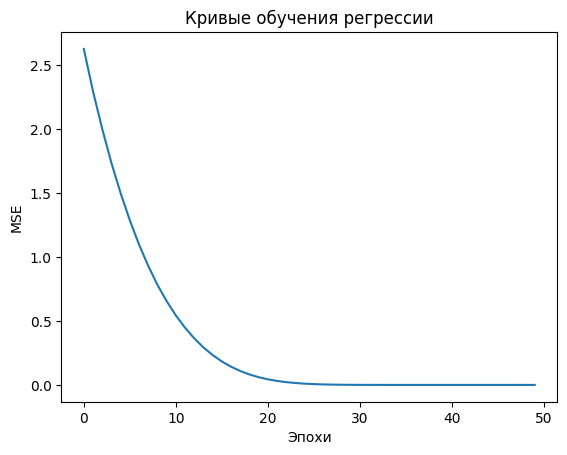

In [ ]:
# Пункт 2: Визуализация кривых обучения 
plt.plot(best_model[1].history['loss'])
plt.title('Кривые обучения регрессии')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.show()

4/4 [==============================] - 0s 3ms/step


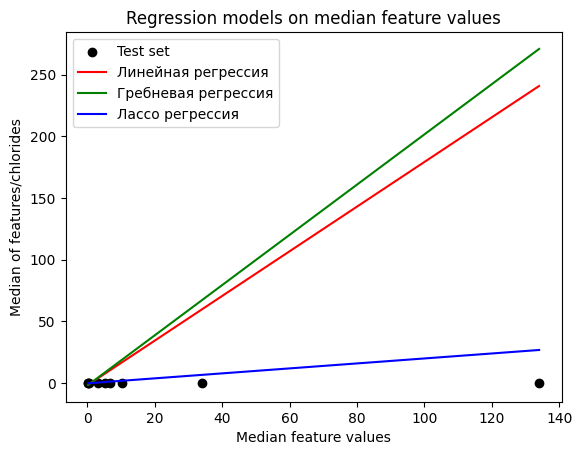

In [ ]:
# Пункт 3
# Медиан каждого признаика
median_values = df.drop(['features/chlorides', 'features/density'], axis=1).median()

# Медиан y советующем со своим признаком
median_y = df['features/chlorides'].median()

models = {'Линейная регрессия': lin_reg_model, 'Гребневая регрессия': ridge_model, 'Лассо регрессия': lasso_model}
colors = {'Линейная регрессия': 'r', 'Гребневая регрессия': 'g', 'Лассо регрессия': 'b'}

# scatter plot
plt.scatter(median_values, [median_y]*len(median_values), color='k', label='Test set')

# Plot regression models
for name, model in models.items():
    x_pred = np.linspace(median_values.min(), median_values.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_pred)
    plt.plot(x_pred, y_pred, color=colors[name], label=name)

# Add labels and title
plt.xlabel('Median feature values')
plt.ylabel('Median of features/chlorides')
plt.legend()
plt.title('Regression models on median feature values')

# Display plot
plt.show()